<a href="https://colab.research.google.com/github/sclaudiobr/covid2019/blob/master/covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prophet - previsão de dados com framework prophet

## Formato de dados e colunas
<p> datas (ds)
<p> variável (y)

*por: Claudio R. O da Silva*

In [0]:
import pandas as pd
import numpy as np
from fbprophet import Prophet

In [0]:
#covid = pd.read_csv('https://raw.githubusercontent.com/sandeco/CanalSandeco/master/covid-19/covid_19_data.csv')
covid = pd.read_csv('https://raw.githubusercontent.com/sclaudiobr/covid2019/master/covid_19_data.csv')
#covid = pd.read_csv('https://raw.githubusercontent.com/sclaudiobr/covid2019/master/brazil_covid19_210320.csv')

In [0]:
covid.tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
7921,7922,03/22/2020,NaN,Jersey,2020-03-17T18:33:03,0.0,0.0,0.0
7922,7923,03/22/2020,NaN,Puerto Rico,2020-03-22T22:43:02,0.0,1.0,0.0
7923,7924,03/22/2020,NaN,Republic of the Congo,2020-03-17T21:33:03,0.0,0.0,0.0
7924,7925,03/22/2020,NaN,The Bahamas,2020-03-19T12:13:38,0.0,0.0,0.0
7925,7926,03/22/2020,NaN,The Gambia,2020-03-18T14:13:56,0.0,0.0,0.0


In [0]:
covid.rename(columns ={'ObservationDate':'Date','Country/Region':'Country'}, inplace=True)

In [0]:
covid.tail()

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
7921,7922,03/22/2020,NaN,Jersey,2020-03-17T18:33:03,0.0,0.0,0.0
7922,7923,03/22/2020,NaN,Puerto Rico,2020-03-22T22:43:02,0.0,1.0,0.0
7923,7924,03/22/2020,NaN,Republic of the Congo,2020-03-17T21:33:03,0.0,0.0,0.0
7924,7925,03/22/2020,NaN,The Bahamas,2020-03-19T12:13:38,0.0,0.0,0.0
7925,7926,03/22/2020,NaN,The Gambia,2020-03-18T14:13:56,0.0,0.0,0.0


In [0]:
from datetime import datetime as dt

In [0]:
# numero de mortes
mortes = covid.groupby('Date').sum()['Deaths'].reset_index()
mortes.tail()
mortes['Date'] = pd.to_datetime(mortes['Date'])

In [0]:
confirmados = covid.groupby('Date').sum()['Confirmed'].reset_index()
confirmados.tail()
confirmados['Date'] = pd.to_datetime(confirmados['Date'])

In [0]:
# plotando
mortes.plot()

ValueError: ignored

<Figure size 432x288 with 1 Axes>

In [0]:
confirmados.columns = ['ds','y']

In [0]:
# tratamento dos dados para o prophet - renomeando
mortes.columns = ['ds','y']
mortes.tail()

,ds,y
56,2020-03-18,8733.0
57,2020-03-19,9867.0
58,2020-03-20,11299.0
59,2020-03-21,12973.0
60,2020-03-22,14634.0


In [0]:
confirmados['ds'] = pd.to_datetime(confirmados['ds'])
confirmados.tail()

,ds,y
56,2020-03-18,214915.0
57,2020-03-19,242713.0
58,2020-03-20,272167.0
59,2020-03-21,304528.0
60,2020-03-22,335957.0


In [0]:
# formatando data
mortes['ds'] = pd.to_datetime(mortes['ds'])
mortes.tail()

,ds,y
56,2020-03-18,8733.0
57,2020-03-19,9867.0
58,2020-03-20,11299.0
59,2020-03-21,12973.0
60,2020-03-22,14634.0


In [0]:
dias = 90
m = Prophet(interval_width= 0.95)
m.fit(confirmados)
futuro = m.make_future_dataframe(periods=dias)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
# uso do prophet
dias = 30
m = Prophet(interval_width= 0.95)
m.fit(mortes)
futuro = m.make_future_dataframe(periods=dias)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
#futuro.tail(dias)

In [0]:
previsao = m.predict(futuro)
#previsao.tail(dias)

In [0]:
previsao[['ds', 'yhat_lower','yhat','yhat_upper']].tail(dias)

,ds,yhat_lower,yhat,yhat_upper
61,2020-03-23,11367.195435,12445.098290,13472.634186
62,2020-03-24,12019.572887,13047.779936,13994.826134
63,2020-03-25,12704.715604,13716.072155,14765.740038
64,2020-03-26,13253.444458,14346.894063,15454.407859
65,2020-03-27,13957.302158,15056.929104,16138.662850
66,2020-03-28,14720.531366,15786.738201,16932.887704
67,2020-03-29,15456.950597,16534.181389,17581.383631
68,2020-03-30,15766.136886,16872.758042,17939.780202
69,2020-03-31,16282.661049,17475.439688,18658.942139
70,2020-04-01,16891.995524,18143.731907,19315.734841


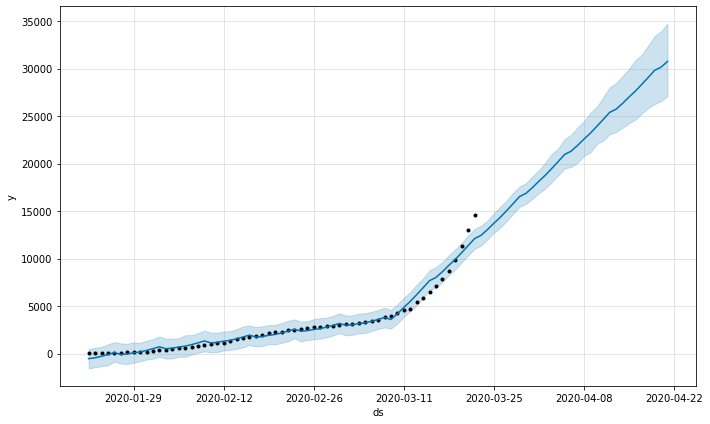

In [0]:
confirmed_forecast_plot = m.plot(previsao)

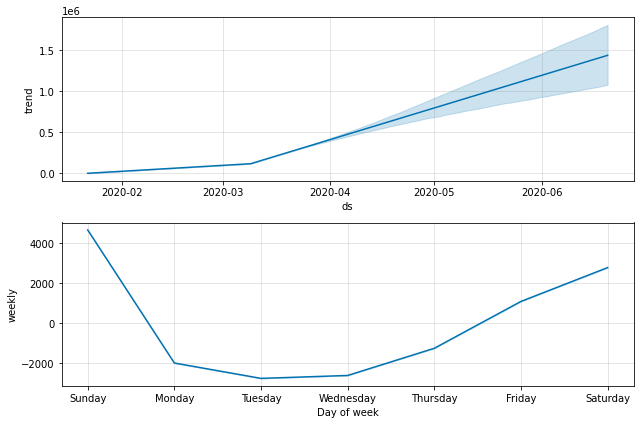

In [0]:
fig2 = m.plot_components(previsao)

In [0]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

NameError: ignored